In [8]:

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime

import matplotlib.pyplot as plt

tt =pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv")
print(tt.head())


   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4


In [12]:
df = web.DataReader('^DJI', 'stooq')
print(df.head())
print(df['Open'].describe())
#df['Open'].plot(alpha=0.5, style='-')

                Open      High       Low     Close       Volume
Date                                                           
2023-02-17  33677.01  33846.64  33517.73  33826.69  307900390.0
2023-02-16  33992.09  34041.16  33686.59  33696.85  319323817.0
2023-02-15  34008.63  34130.49  33833.10  34128.05  273467000.0
2023-02-14  34194.09  34331.47  33827.45  34089.27  293168223.0
2023-02-13  33887.39  34249.60  33887.39  34245.93  304272069.0
count     1257.000000
mean     29277.047192
std       4055.142271
min      19028.360000
25%      25786.990000
50%      28384.070000
75%      33450.920000
max      36722.600000
Name: Open, dtype: float64


In [39]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data1': range(6), 'data2': np.random.randint(0, 10, 6)}, columns = ['key', 'data1', 'data2'])
print("Data")
print(df)
d1 = df.groupby('key').aggregate({'data1': 'min', 'data2': ['max', 'std', 'mean']})
print("Data min max")
print(d1)
d2 = df.groupby('key').filter(lambda x: x['data2'].std() > 4)
print("Data filtered")
print(d2)
df['tr'] = df.groupby('key')['data2'].transform(lambda x: x - x.mean())
print("Data transf")
print(df) 
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x
d4 = df.groupby('key', group_keys=False).apply(norm_by_data2)
print(d4)
d5 = df.groupby('key').apply(norm_by_data2) # norm_by_data_2 se aplica pe fiecare grup individual (peste care se itereaza) din df-ul df.groupby('key')
print(d5)

Data
  key  data1  data2
0   A      0      8
1   B      1      6
2   C      2      8
3   A      3      9
4   B      4      9
5   C      5      1
Data min max
    data1 data2               
      min   max       std mean
key                           
A       0     9  0.707107  8.5
B       1     9  2.121320  7.5
C       2     8  4.949747  4.5
Data filtered
  key  data1  data2
2   C      2      8
5   C      5      1
Data transf
  key  data1  data2   tr
0   A      0      8 -0.5
1   B      1      6 -1.5
2   C      2      8  3.5
3   A      3      9  0.5
4   B      4      9  1.5
5   C      5      1 -3.5
  key     data1  data2   tr
0   A  0.000000      8 -0.5
1   B  0.066667      6 -1.5
2   C  0.222222      8  3.5
3   A  0.176471      9  0.5
4   B  0.266667      9  1.5
5   C  0.555556      1 -3.5
  key     data1  data2   tr
0   A  0.000000      8 -0.5
1   B  0.066667      6 -1.5
2   C  0.222222      8  3.5
3   A  0.176471      9  0.5
4   B  0.266667      9  1.5
5   C  0.555556      1 -3.5


C:\Users\aianau\AppData\Local\Temp\ipykernel_12940\2785233400.py:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  d5 = df.groupby('key').apply(norm_by_data2) # norm_by_data_2 se aplica pe fiecare grup individual (peste care se itereaza) din df-ul df.groupby('key')


In [40]:
from pandas_datareader import wb
f = wb.download(indicator='AG.LND.FRST.ZS', country = 'all', start =1990, end = 2020) # world bank forest area
f.rename(columns={"AG.LND.FRST.ZS": "sp"}, inplace=True)
print(f.head())
#print(f.index)
print(f.loc[('Australia')])
f.groupby('country').aggregate({'sp': ['min', 'max']})



                                         sp
country                     year           
Africa Eastern and Southern 2020  30.174186
                            2019  30.391558
                            2018  30.611444
                            2017  30.824248
                            2016  31.039613
             sp
year           
2020  17.421315
2019  17.421315
2018  17.421315
2017  17.422914
2016  17.425488
2015  17.324825
2014  17.232446
2013  17.140067
2012  17.047689
2011  16.955310
2010  16.862932
2009  16.892454
2008  16.921976
2007  16.951499
2006  16.981021
2005  17.010544
2004  17.040066
2003  17.069589
2002  17.099111
2001  17.128633
2000  17.158156
1999  17.185076
1998  17.211996
1997  17.238917
1996  17.265837
1995  17.292757
1994  17.319678
1993  17.346598
1992  17.373518
1991  17.400439
1990  17.427359


sp           
                                   min        max
country                                          
Afghanistan                   1.852782   1.852782
Africa Eastern and Southern  30.174186  36.230006
Africa Western and Central   19.816777  22.776908
Albania                      28.076642  28.802464
Algeria                       0.662961   0.821248
...                                ...        ...
West Bank and Gaza            1.508306   1.684385
World                        30.716421  31.624509
Yemen, Rep.                   1.039832   1.039832
Zambia                       60.283337  63.778098
Zimbabwe                     45.093912  48.666615

[266 rows x 2 columns]

In [42]:
def best_y(row):
    return row.index[row.argmax()][1]

fs = f.unstack()
fs['max_year'] = fs.apply(best_y, axis = 1)
print(fs['max_year'])



country
Afghanistan                    1990
Africa Eastern and Southern    1990
Africa Western and Central     1990
Albania                        2015
Algeria                        2015
                               ... 
West Bank and Gaza             2015
World                          1990
Yemen, Rep.                    1990
Zambia                         1990
Zimbabwe                       1990
Name: max_year, Length: 266, dtype: object


In [43]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B'],
                   'prop': ['F', 'T', 'T', 'F', 'G', 'G', 'F', 'G'],
                   'class': [1, 2, 1, 2, 3, 1, 1, 1],
                   'data1': range(8),
                   'data2': np.random.randint(0, 10, 8)},
                   columns = ['key', 'prop','class', 'data1', 'data2'])
print(df)
print(df.groupby(['key', 'class'])['data1'].aggregate('mean'))
print(df.pivot_table('data1', index='key', columns='class'))
print(df.pivot_table(['data1','data2'], index=['class', 'prop'], columns='key', fill_value = 0))


  key prop  class  data1  data2
0   A    F      1      0      9
1   B    T      2      1      8
2   C    T      1      2      7
3   A    F      2      3      1
4   B    G      3      4      2
5   C    G      1      5      4
6   A    F      1      6      2
7   B    G      1      7      9
key  class
A    1        3.0
     2        3.0
B    1        7.0
     2        1.0
     3        4.0
C    1        3.5
Name: data1, dtype: float64
class    1    2    3
key                 
A      3.0  3.0  NaN
B      7.0  1.0  4.0
C      3.5  NaN  NaN
           data1       data2      
key            A  B  C     A  B  C
class prop                        
1     F        3  0  0   5.5  0  0
      G        0  7  5   0.0  9  4
      T        0  0  2   0.0  0  7
2     F        3  0  0   1.0  0  0
      T        0  1  0   0.0  8  0
3     G        0  4  0   0.0  2  0


RangeIndex(start=0, stop=8, step=1)

In [48]:
births = pd.read_csv('births.csv')
print(births.head())
births['decade'] = 10 * (births['year'] // 10)
print(births.pivot_table('births', index='decade', columns='gender', aggfunc='sum'))
births_by_date = births.pivot_table('births',['month','day'])
print(births_by_date.head())


   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428
             births
month day          
1     1.0  4009.225
      2.0  4247.400
      3.0  4500.900
      4.0  4571.350
      5.0  4603.625


In [45]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
dev = births.query('(births < @mu - 2 * @sig) | (births > @mu + 2 * @sig)')
print(dev)

       year  month   day gender  births  decade
763    1969     12  30.0      M    6244    1960
1179   1970      7  14.0      M    6208    1970
1251   1970      8  18.0      M    6138    1970
1297   1970      9   9.0      M    6120    1970
1299   1970      9  10.0      M    6114    1970
...     ...    ...   ...    ...     ...     ...
14878  1988      9  29.0      F    6111    1980
14879  1988      9  29.0      M    6136    1980
14881  1988      9  30.0      M    6295    1980
14889  1988     10   4.0      M    6205    1980
15044  1988     12  20.0      M    6343    1980

[195 rows x 6 columns]


In [46]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
cats = pd.cut(ages, bins, labels=group_names)
print(cats.codes)
print(pd.value_counts(cats))

[0 0 0 1 0 0 2 1 3 2 2 1]
Youth         5
YoungAdult    3
MiddleAged    3
Senior        1
dtype: int64


In [47]:
Mo = list(range(13))
print(Mo)
dbirth = pd.cut(births['month'], Mo)
print(births.pivot_table('births', dbirth, columns='gender', aggfunc='sum'))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
gender          F        M
month                     
(0, 1]    2809873  2949292
(1, 2]    2616480  2746105
(2, 3]    2859579  3008561
(3, 4]    2706286  2854489
(4, 5]    2812850  2972370
(5, 6]    2798146  2960425
(6, 7]    3026051  3194244
(7, 8]    3075351  3234413
(8, 9]    3029083  3176889
(9, 10]   2955703  3099669
(10, 11]  2776370  2918903
(11, 12]  2883919  3020457


In [57]:
date = pd.to_datetime("4th of July, 2015")
date + pd.to_timedelta(np.arange(12), 'D')
print(date)
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04','2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
print(data)
print(data.index)
print(data['2015-07'])

2015-07-04 00:00:00
2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64
DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)
2015-07-04    2
dtype: int64


In [78]:

dates = pd.to_datetime(['2015-07-03', '4th of July, 2015','2015-Jul-6', '07-07-2015', '20150710'])
print(dates)
dd = dates.to_period('H') 
print(dd)
print(dates - dates[0])
d = pd.Series(np.random.randn(10), index=pd.date_range('1/1/2000', periods=10, freq='M'))

print(d)
print(d.shift(2))         
d.index = d.index.shift(4)
print(d)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-10'],
              dtype='datetime64[ns]', freq=None)
PeriodIndex(['2015-07-03 00:00', '2015-07-04 00:00', '2015-07-06 00:00',
             '2015-07-07 00:00', '2015-07-10 00:00'],
            dtype='period[H]')
TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '7 days'], dtype='timedelta64[ns]', freq=None)
2000-01-31    0.543151
2000-02-29    0.017957
2000-03-31    0.283711
2000-04-30   -2.260395
2000-05-31   -0.048103
2000-06-30   -0.873390
2000-07-31    0.134975
2000-08-31    0.766286
2000-09-30    0.384769
2000-10-31   -0.745922
Freq: M, dtype: float64
2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.543151
2000-04-30    0.017957
2000-05-31    0.283711
2000-06-30   -2.260395
2000-07-31   -0.048103
2000-08-31   -0.873390
2000-09-30    0.134975
2000-10-31    0.766286
Freq: M, dtype: float64
2000-05-31    0.543151
2000-06-30    0.017957
2000-07-31    0.283711
2000-08-31  

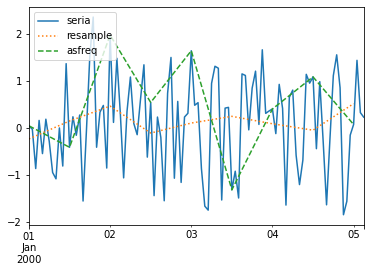

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2000', periods=100, freq='h'))
dr  = d.resample('12h').mean()
dfs = d.asfreq(freq = '12h')
d.plot(style='-')
dr.plot(style=':')
dfs.plot(style='--')
plt.legend(['seria', 'resample', 'asfreq'], loc='upper left');

2000-01-05   -0.183430
2000-01-06   -0.186851
2000-01-07   -0.190273
2000-01-08   -0.193694
2000-01-09   -0.197115
                ...   
2001-11-24    0.633417
2001-11-25    0.473520
2001-11-26    0.313623
2001-11-27    0.153726
2001-11-28   -0.006171
Freq: D, Length: 694, dtype: float64
2000-01-05   -0.183430
2000-01-06   -0.207380
2000-01-07   -0.207380
2000-01-08   -0.207380
2000-01-09   -0.207380
                ...   
2001-11-24   -0.006171
2001-11-25   -0.006171
2001-11-26   -0.006171
2001-11-27   -0.006171
2001-11-28   -0.006171
Freq: D, Length: 694, dtype: float64


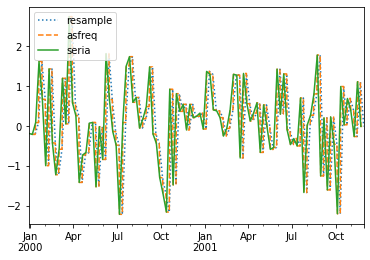

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2000', periods=100, freq='W-WED'))
dr  = d.resample('D').mean().interpolate()
dfs = d.asfreq(freq = 'D', method = 'bfill')


dr.plot(style=':')
dfs.plot(style='--')
d.plot(style='-')
plt.legend(['resample', 'asfreq', 'seria'], loc='upper left');
print(dr)
print(dfs)

In [117]:
import numpy as np
import pandas as pd

#df = pd.DataFrame(np.random.randn(10, 2),index=pd.date_range("2020-01-01", periods=10), columns=["A", "B"])
df = pd.DataFrame({'A':range(0,10), 'B':range(20,30)},index=pd.date_range("2020-01-01", periods=10))
print(df)
print(df.rolling(3, min_periods=1, center=True).mean())
print(df.rolling(3).cov(df[["A", "B"]], pairwise=True))
print(df.rolling(3).agg({"A": "sum", "B": "min"}))



            A   B
2020-01-01  0  20
2020-01-02  1  21
2020-01-03  2  22
2020-01-04  3  23
2020-01-05  4  24
2020-01-06  5  25
2020-01-07  6  26
2020-01-08  7  27
2020-01-09  8  28
2020-01-10  9  29
              A     B
2020-01-01  0.5  20.5
2020-01-02  1.0  21.0
2020-01-03  2.0  22.0
2020-01-04  3.0  23.0
2020-01-05  4.0  24.0
2020-01-06  5.0  25.0
2020-01-07  6.0  26.0
2020-01-08  7.0  27.0
2020-01-09  8.0  28.0
2020-01-10  8.5  28.5
                A    B
2020-01-01 A  NaN  NaN
           B  NaN  NaN
2020-01-02 A  NaN  NaN
           B  NaN  NaN
2020-01-03 A  1.0  1.0
           B  1.0  1.0
2020-01-04 A  1.0  1.0
           B  1.0  1.0
2020-01-05 A  1.0  1.0
           B  1.0  1.0
2020-01-06 A  1.0  1.0
           B  1.0  1.0
2020-01-07 A  1.0  1.0
           B  1.0  1.0
2020-01-08 A  1.0  1.0
           B  1.0  1.0
2020-01-09 A  1.0  1.0
           B  1.0  1.0
2020-01-10 A  1.0  1.0
           B  1.0  1.0
               A     B
2020-01-01   NaN   NaN
2020-01-02   NaN   NaN
2020-01-

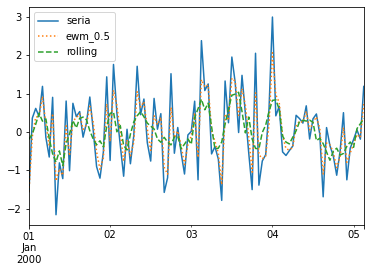

In [127]:
d = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2000', periods=100, freq='h'))
dr  = d.ewm(com = 0.5).mean()
#dfs = d.ewm(com = 0.9).mean()
dfs = d.rolling(5, min_periods=1, center=True).mean()
d.plot(style='-')
dr.plot(style=':')
dfs.plot(style='--')
plt.legend(['seria', 'ewm_0.5', 'rolling'], loc='upper left');